In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28,28,1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# scale images to the 0-1 range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Add channel dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
# one-hot encode classes
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("y_train shape:", y_train.shape)

y_train shape: (60000, 10)


In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [6]:
# Train the model
batch_size=128
epochs=20

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 20s 368us/sample - loss: 0.3275 - accuracy: 0.9019 - val_loss: 0.0817 - val_accuracy: 0.9763
Epoch 2/20
54000/54000 [==============================] - 24s 447us/sample - loss: 0.1116 - accuracy: 0.9662 - val_loss: 0.0552 - val_accuracy: 0.9858
Epoch 3/20
54000/54000 [==============================] - 25s 459us/sample - loss: 0.0850 - accuracy: 0.9736 - val_loss: 0.0500 - val_accuracy: 0.9862
Epoch 4/20
54000/54000 [==============================] - 24s 450us/sample - loss: 0.0694 - accuracy: 0.9782 - val_loss: 0.0450 - val_accuracy: 0.9883
Epoch 5/20
54000/54000 [==============================] - 24s 446us/sample - loss: 0.0613 - accuracy: 0.9806 - val_loss: 0.0411 - val_accuracy: 0.9893
Epoch 6/20
54000/54000 [==============================] - 24s 453us/sample - loss: 0.0547 - accuracy: 0.9835 - val_loss: 0.0381 - val_accuracy: 0.9910
Epoch 7/20
54000/54000 [=====================

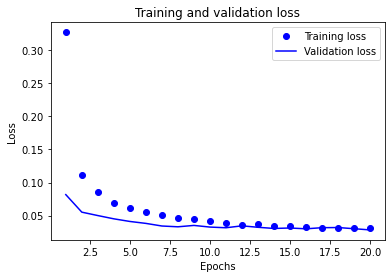

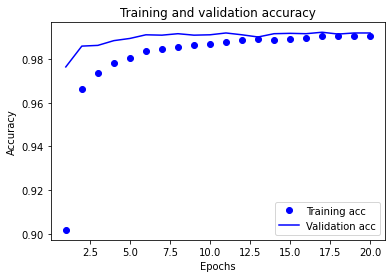

In [13]:
import matplotlib.pyplot as plt
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs_range, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs_range, history.history['accuracy'], 'bo', label='Training acc')
plt.plot(epochs_range, history.history['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Target 2
Predictions 7


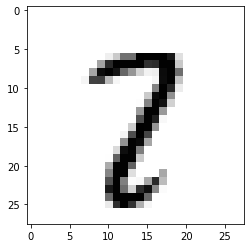

Target 2
Predictions 0


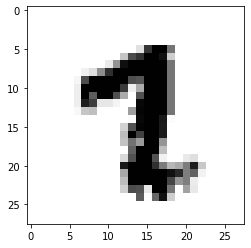

Target 7
Predictions 5


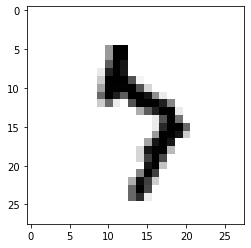

In [43]:
# show wrong predictions
predictions = np.round(model.predict(x_test))
boolean_wrong_predictions = np.any(predictions!=y_test, axis=1)
wrong_predictions = x_test[boolean_wrong_predictions]
wrong_predictions = np.reshape(wrong_predictions,(wrong_predictions.shape[0],28,28))
targets = y_test[boolean_wrong_predictions]
predictions = predictions[boolean_wrong_predictions]

for x in range(1,4):
    print("Target", np.argmax(targets[x]))
    print("Predictions", np.argmax(predictions[x]))
    # colormap gray bzw gray_r is reverse
    plt.imshow(wrong_predictions[x], cmap='gray_r')
    plt.show()

In [45]:
# Evaluate the trained model on the test data
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.022243147823958132
Test accuracy: 0.9925
